In [1]:
import pandas as pd
import tarfile

from sklearn.cluster import KMeans

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def plot_inertia(working_arr, cluster_count=15, m_threshold=2.):
    clusters= [i for i in xrange(1,cluster_count + 1)]

    n_jobs= -2
    random_state=47
    max_iter=100

    error= np.zeros(len(clusters))

    for i in xrange(0, len(clusters)):
        kmeans= KMeans(n_clusters=clusters[i], n_jobs=n_jobs, max_iter=max_iter, random_state=random_state)
        print("Executing kmeans: {}".format(kmeans))

        kmeans.fit(working_arr)

        error[i]= np.sqrt(kmeans.inertia_)
    
    fig, ax= plt.subplots(figsize=(16,8))
    ax.plot(error)
    
    x_ticks_major= [i for i in xrange(len(clusters))]
    x_labels_major= [str(c) for c in clusters]
    ax.set_xticks(x_ticks_major, minor=False)
    ax.set_xticklabels(x_labels_major, minor=False, rotation=65)
    ax.set_xlabel("cluster count")
    ax.set_ylabel("within-cluster sum of squares")
    ax.grid(True, which='major')

Executing kmeans: KMeans(copy_x=True, init='k-means++', max_iter=100, n_clusters=1, n_init=10,
    n_jobs=-2, precompute_distances='auto', random_state=47, tol=0.0001,
    verbose=0)
Executing kmeans: KMeans(copy_x=True, init='k-means++', max_iter=100, n_clusters=2, n_init=10,
    n_jobs=-2, precompute_distances='auto', random_state=47, tol=0.0001,
    verbose=0)
Executing kmeans: KMeans(copy_x=True, init='k-means++', max_iter=100, n_clusters=3, n_init=10,
    n_jobs=-2, precompute_distances='auto', random_state=47, tol=0.0001,
    verbose=0)
Executing kmeans: KMeans(copy_x=True, init='k-means++', max_iter=100, n_clusters=4, n_init=10,
    n_jobs=-2, precompute_distances='auto', random_state=47, tol=0.0001,
    verbose=0)
Executing kmeans: KMeans(copy_x=True, init='k-means++', max_iter=100, n_clusters=5, n_init=10,
    n_jobs=-2, precompute_distances='auto', random_state=47, tol=0.0001,
    verbose=0)
Executing kmeans: KMeans(copy_x=True, init='k-means++', max_iter=100, n_clusters=6, n

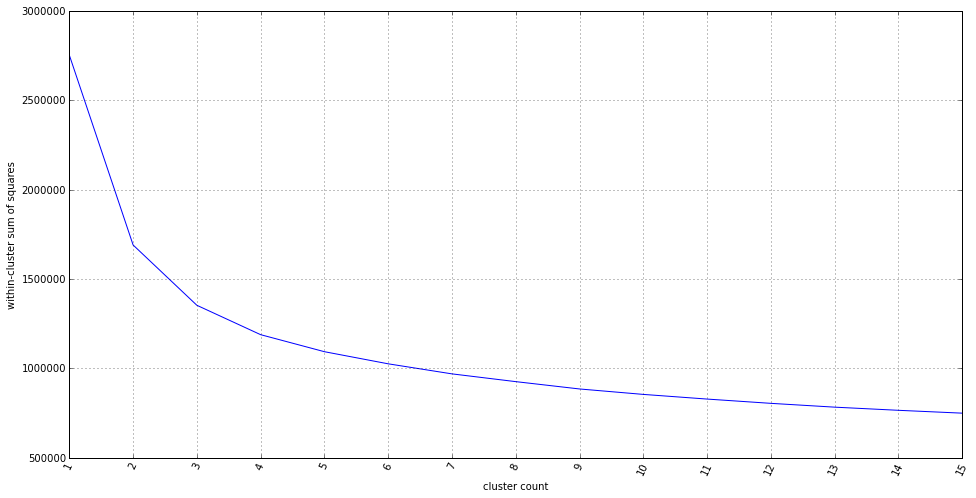

In [4]:
sourcetranspath= './data/weekday/total_flow_transformed.pivot_2009_grouping_weekday_pca_transform_tmp.csv.tar.gz'
transpath= './total_flow_transformed.pivot_2009_grouping_weekday_pca_transform_tmp.csv'

with tarfile.open(sourcetranspath) as tar:
    tar.extractall()

m_df = pd.read_csv(transpath, header=None)
df_arr= m_df[[i for i in xrange(6, 10)]].values
plot_inertia(df_arr)